<a href="https://colab.research.google.com/github/Smartpero/ML_Projects/blob/main/Deep_Learning_Obesity_Level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, normalize
from sklearn.model_selection import train_test_split

In [ ]:
# load csv data
import google.colab.files as files
uploaded = files.upload()


Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

Source: [UCI](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)


In [ ]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.dropna()
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
features = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad'] # target variable

In [ ]:
# Identify categorical features columns
cat_features = features.select_dtypes(include=['object']).columns
print("Categorical columns in the features DataFrame:")
for col in cat_features:
  print(col)

Categorical columns in the features DataFrame:
Gender
family_history_with_overweight
FAVC
CAEC
SMOKE
SCC
CALC
MTRANS


In [ ]:
# Encode Categorical Features using LabelEncoder
encoder = LabelEncoder()
for col in cat_features:
  features[col] = encoder.fit_transform(features[col])



In [ ]:
#display features
features.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


In [ ]:
# Normalize features
features = StandardScaler().fit_transform(features)
features

array([[-1.01191369, -0.52212439, -0.87558934, ...,  0.56199675,
         1.4191716 ,  0.50333674],
       [-1.01191369, -0.52212439, -1.94759928, ..., -1.08062463,
        -0.52115952,  0.50333674],
       [ 0.98822657, -0.20688898,  1.05402854, ...,  0.56199675,
        -2.46149063,  0.50333674],
       ...,
       [-1.01191369, -0.28190933,  0.54167211, ..., -0.01901815,
        -0.52115952,  0.50333674],
       [-1.01191369,  0.00777624,  0.40492652, ..., -0.11799101,
        -0.52115952,  0.50333674],
       [-1.01191369, -0.10211908,  0.39834438, ...,  0.09243207,
        -0.52115952,  0.50333674]])

In [ ]:
# Encode target variable
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

one_hot_encoder = OneHotEncoder()
y = one_hot_encoder.fit_transform(y_encoded.reshape(-1, 1))
y

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2111 stored elements and shape (2111, 7)>

In [ ]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

Model Development

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,887 (42.53 KB)

 Trainable params: 10,887 (42.53 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Add optimizer and learning rate
optimizer = Adam(learning_rate=0.001)

In [ ]:
# compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit the model
history = model.fit(X_train, y_train.toarray(), epochs=50, batch_size=32, validation_data=(X_test, y_test.toarray()))

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1727 - loss: 2.0508 - val_accuracy: 0.5768 - val_loss: 1.5950
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3706 - loss: 1.6610 - val_accuracy: 0.5887 - val_loss: 1.2503
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4809 - loss: 1.3689 - val_accuracy: 0.6407 - val_loss: 1.0208
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5311 - loss: 1.2002 - val_accuracy: 0.6714 - val_loss: 0.9083
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5811 - loss: 1.1093 - val_accuracy: 0.6998 - val_loss: 0.8384
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5992 - loss: 1.0488 - val_accuracy: 0.7234 - val_loss: 0.7810
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6285 - loss: 0.9678 - val_accuracy: 0.7329 - val_loss: 0.7289
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6360 - loss: 0.9621 - val_accuracy: 0.7589 - val_loss:

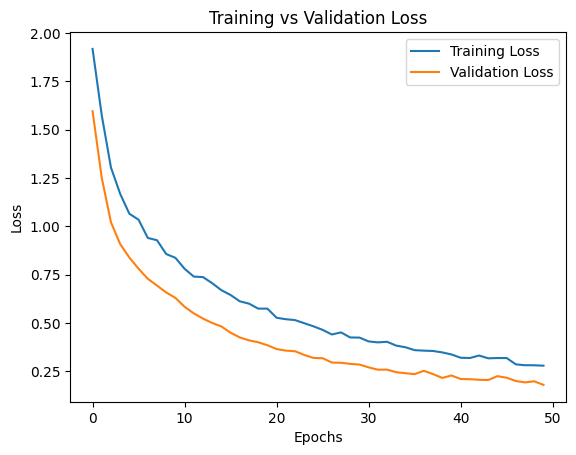

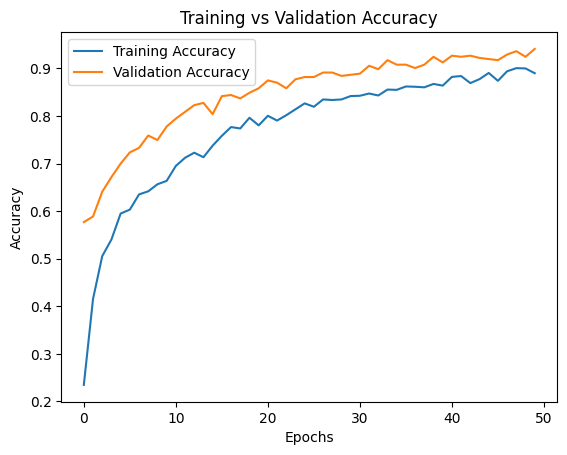

In [ ]:
# Plot history of training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

#Plot history of training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

Summary:
- Validation loss is lower than an training loss.
- training accuracy is less than the validation data accuracy. Validation accuracy is 94%.
- model generalises well on unseen data.

**Regression: Obesity Levels Based on Eating Levels**

In [65]:
# predict obesity levels using arbitrary data
new_data = {"Gender": ["Male"], 'Age':[22], 'Height':[1.65], 'Weight': [77], 'family_history_with_overweight':['yes'], 'FAVC': ['yes'], 'FCVC': ['no'], 'NCP':[2], 'CAEC':['no'], 'SMOKE':['no'], 'CH2O':[3], 'SCC':['no'], 'FAF':['Sometimes'], 'TUE':['2'], 'CALC':['no'], 'MTRANS':['Bike'] }
new_data = pd.DataFrame(new_data)

# Identify categorical features columns in new_data
cat_features_new = new_data.select_dtypes(include=['object']).columns

# Encode Categorical Features using LabelEncoder
encoder_new = LabelEncoder()
for col in cat_features_new:
  new_data[col] = encoder_new.fit_transform(new_data[col])

new_data_normalized = StandardScaler().fit_transform(new_data)
y_pred = model.predict(new_data_normalized)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.00177322, 0.01187156, 0.43973264, 0.10538246, 0.02471516,
        0.06345579, 0.35306925]], dtype=float32)

In [66]:
predicted_labels = y_pred.argmax(axis=1)
predicted_labels

array([2])

In [67]:
# decode predicted_labels into target features
decoded_labels = label_encoder_y.inverse_transform(predicted_labels)

In [69]:
print("Predicted Obesity Level:", decoded_labels[0])

Predicted Obesity Level: Obesity_Type_I


This arbitrary person (as described in the new data) has Type 1 Obesity